In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_sao = pd.read_csv('saopaulo_crimes.csv')

In [3]:
df_sao.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


In [4]:
df_sao.columns

Index(['id', 'bairro', 'created_at', 'descricao', 'endereco', 'id.1',
       'ip_address_origin', 'latitude', 'longitude', 'registrou_bo', 'sexo',
       'tipo_assalto_id', 'titulo', 'uri', 'user_id', 'valor_prejuizo',
       'Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'time'],
      dtype='object')

In [5]:
# We will not work with location in this EDA. This wil be used to clustering the boroughs later. #

df_sao.drop(['id.1','ip_address_origin','latitude','longitude','registrou_bo'], axis =1, inplace = True)

In [6]:
df_sao.head(10)

,id,bairro,created_at,descricao,endereco,sexo,tipo_assalto_id,titulo,uri,user_id,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",0,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",1,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,1,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",0,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",1,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000
5,14160,Butantã,2013-12-02 14:17:28.941,Ao sair do carro para abrir o portaõ dois indi...,"Rua Júlia Della Nina, 6-28 - Butantã, São Paul...",1,9,Levaram o carro quando saí para abrir o portão...,/denuncias/zE4G1e-levaram-o-carro-quando-sai-p...,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,2012-01-10 21:15:00.000
6,15422,Sumaré,2014-01-22 16:45:38.790,Fique 30min. na companhia dos assaltantes em q...,"Rua Paris, 816 - Sumaré, São Paulo - SP, 01257...",1,4,Fui abordado ao entrar no carro,/denuncias/a47GDz-fui-abordado-ao-entrar-no-carro,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,2012-01-09 19:30:00.000
7,7409,Vila Mariana,2013-08-22 00:33:16.047,Estava eu e um amigo descendo a Av. Lins de Va...,"Rua Pero Correia, 24-42 - Vila Mariana, São Pa...",0,3,Fui assaltada voltando no metrô vila mariana,/denuncias/aqm8pa-fui-assaltada-voltando-no-me...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-08 22:01:00.000
8,8669,Barra Funda,2013-08-26 13:23:41.975,Roubaram minha moto quando chegava da Rod. dos...,"Avenida Marquês de São Vicente, 2064-2100 - Ba...",1,9,Roubo de moto.,/denuncias/eWLWOz-roubo-de-moto,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-08 11:15:00.000
9,8496,Santana,2013-08-25 00:28:16.550,Furtaram o meu carro numa rua residencial.\r\n...,"Rua Carlos Camargo Aranha, 99-161 - Santana, S...",1,9,Fui trabalhar e ao voltar: cadê o carro?,/denuncias/eXx3xe-fui-trabalhar-e-ao-voltar-ca...,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-06 08:30:00.000


In [7]:
df_sao.drop(['endereco','uri','user_id'], axis =1, inplace = True)

In [8]:
df_sao.head(10)

,id,bairro,created_at,descricao,sexo,tipo_assalto_id,titulo,valor_prejuizo,Bicicleta,Bolsa ou Mochila,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...",0,6,Entraram na minha casa e ficaram por 2h30,60.0,NaN,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...",1,1,Rádio do Carro Furtado,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",1,1,Rádio do carro furtado no estacionamento PAGO ...,300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...",0,5,Quebraram a janela do meu carro,2500.0,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,1,1,Arrombaram meu carro que estava no estacioname...,9999.0,NaN,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000
5,14160,Butantã,2013-12-02 14:17:28.941,Ao sair do carro para abrir o portaõ dois indi...,1,9,Levaram o carro quando saí para abrir o portão...,0.0,NaN,True,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,2012-01-10 21:15:00.000
6,15422,Sumaré,2014-01-22 16:45:38.790,Fique 30min. na companhia dos assaltantes em q...,1,4,Fui abordado ao entrar no carro,5000.0,NaN,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,2012-01-09 19:30:00.000
7,7409,Vila Mariana,2013-08-22 00:33:16.047,Estava eu e um amigo descendo a Av. Lins de Va...,0,3,Fui assaltada voltando no metrô vila mariana,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-08 22:01:00.000
8,8669,Barra Funda,2013-08-26 13:23:41.975,Roubaram minha moto quando chegava da Rod. dos...,1,9,Roubo de moto.,30000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-08 11:15:00.000
9,8496,Santana,2013-08-25 00:28:16.550,Furtaram o meu carro numa rua residencial.\r\n...,1,9,Fui trabalhar e ao voltar: cadê o carro?,16500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-06 08:30:00.000


In [9]:
df_sao.columns

Index(['id', 'bairro', 'created_at', 'descricao', 'sexo', 'tipo_assalto_id',
       'titulo', 'valor_prejuizo', 'Bicicleta', 'Bolsa ou Mochila', 'Carteira',
       'Cartão de Crédito', 'Celular', 'Computador', 'DVD', 'Dinheiro',
       'Documentos', 'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis',
       'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'time'],
      dtype='object')

In [10]:
df_sao['Bicicleta'] = df_sao['Bicicleta'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Bolsa ou Mochila'] = df_sao['Bolsa ou Mochila'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Carteira'] = df_sao['Carteira'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Cartão de Crédito'] = df_sao['Cartão de Crédito'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Celular'] = df_sao['Celular'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Computador'] = df_sao['Computador'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['DVD'] = df_sao['DVD'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Dinheiro'] = df_sao['Dinheiro'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Documentos'] = df_sao['Documentos'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Equipamento de Som'] = df_sao['Equipamento de Som'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Estepe'] = df_sao['Estepe'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['MP4 ou Ipod'] = df_sao['MP4 ou Ipod'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Móveis'] = df_sao['Móveis'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Notebook'] = df_sao['Notebook'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Outros'] = df_sao['Outros'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Relógio'] = df_sao['Relógio'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Som'] = df_sao['Som'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Tablet'] = df_sao['Tablet'].apply(lambda x: str(x).replace('True','1').strip())
df_sao['Tv'] = df_sao['Tv'].apply(lambda x: str(x).replace('True','1').strip())

In [11]:
df_sao['Bicicleta'] = df_sao['Bicicleta'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Bolsa ou Mochila'] = df_sao['Bolsa ou Mochila'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Carteira'] = df_sao['Carteira'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Cartão de Crédito'] = df_sao['Cartão de Crédito'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Celular'] = df_sao['Celular'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Computador'] = df_sao['Computador'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['DVD'] = df_sao['DVD'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Dinheiro'] = df_sao['Dinheiro'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Documentos'] = df_sao['Documentos'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Equipamento de Som'] = df_sao['Equipamento de Som'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Estepe'] = df_sao['Estepe'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['MP4 ou Ipod'] = df_sao['MP4 ou Ipod'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Móveis'] = df_sao['Móveis'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Notebook'] = df_sao['Notebook'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Outros'] = df_sao['Outros'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Relógio'] = df_sao['Relógio'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Som'] = df_sao['Som'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Tablet'] = df_sao['Tablet'].apply(lambda x: str(x).replace('nan','0').strip())
df_sao['Tv'] = df_sao['Tv'].apply(lambda x: str(x).replace('nan','0').strip())

In [12]:
df_sao.Dinheiro.describe

<bound method NDFrame.describe of 0        1
1        0
2        0
3        0
4        0
        ..
12894    0
12895    0
12896    0
12897    0
12898    0
Name: Dinheiro, Length: 12899, dtype: object>

In [13]:
df_sao['Bicicleta'] = pd.to_numeric(df_sao['Bicicleta'], errors = 'coerce')
df_sao['Bolsa ou Mochila'] = pd.to_numeric(df_sao['Bolsa ou Mochila'], errors = 'coerce')
df_sao['Cartão de Crédito'] = pd.to_numeric(df_sao['Cartão de Crédito'], errors = 'coerce')
df_sao['Celular'] = pd.to_numeric(df_sao['Celular'], errors = 'coerce')
df_sao['Carteira'] = pd.to_numeric(df_sao['Carteira'], errors = 'coerce')
df_sao['Computador'] = pd.to_numeric(df_sao['Computador'], errors = 'coerce')
df_sao['DVD'] = pd.to_numeric(df_sao['DVD'], errors = 'coerce')
df_sao['Dinheiro'] = pd.to_numeric(df_sao['Dinheiro'], errors = 'coerce')
df_sao['Documentos'] = pd.to_numeric(df_sao['Documentos'], errors = 'coerce')
df_sao['Equipamento de Som'] = pd.to_numeric(df_sao['Equipamento de Som'], errors = 'coerce')
df_sao['Estepe'] = pd.to_numeric(df_sao['Estepe'], errors = 'coerce')
df_sao['MP4 ou Ipod'] = pd.to_numeric(df_sao['MP4 ou Ipod'], errors = 'coerce')
df_sao['Móveis'] = pd.to_numeric(df_sao['Móveis'], errors = 'coerce')
df_sao['Notebook'] = pd.to_numeric(df_sao['Notebook'], errors = 'coerce')
df_sao['Outros'] = pd.to_numeric(df_sao['Outros'], errors = 'coerce')
df_sao['Relógio'] = pd.to_numeric(df_sao['Relógio'], errors = 'coerce')
df_sao['Som'] = pd.to_numeric(df_sao['Som'], errors = 'coerce')
df_sao['Tablet'] = pd.to_numeric(df_sao['Tablet'], errors = 'coerce')
df_sao['Tv'] = pd.to_numeric(df_sao['Tv'], errors = 'coerce')

In [14]:
df_sao.dtypes

id                      int64
bairro                 object
created_at             object
descricao              object
sexo                    int64
tipo_assalto_id         int64
titulo                 object
valor_prejuizo        float64
Bicicleta               int64
Bolsa ou Mochila        int64
Carteira                int64
Cartão de Crédito       int64
Celular                 int64
Computador              int64
DVD                     int64
Dinheiro                int64
Documentos              int64
Equipamento de Som      int64
Estepe                  int64
MP4 ou Ipod             int64
Móveis                  int64
Notebook                int64
Outros                  int64
Relógio                 int64
Som                     int64
Tablet                  int64
Tv                      int64
time                   object
dtype: object

In [15]:
df_bin = df_sao[['Bicicleta', 'Bolsa ou Mochila', 'Carteira',
       'Cartão de Crédito', 'Celular', 'Computador', 'DVD', 'Dinheiro',
       'Documentos', 'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis',
       'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv']]

graph for Bicicleta: total = 2


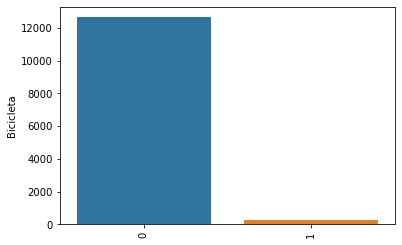

graph for Bolsa ou Mochila: total = 2


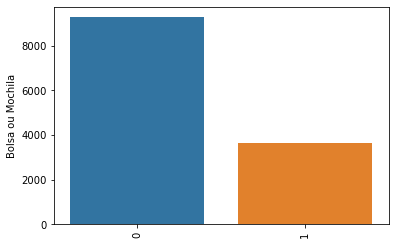

graph for Carteira: total = 2


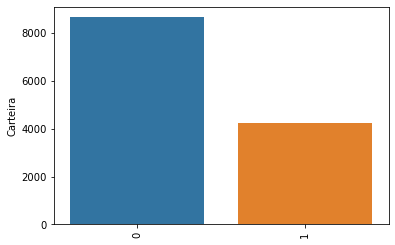

graph for Cartão de Crédito: total = 2


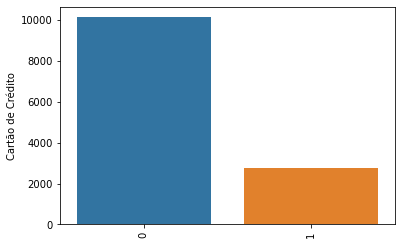

graph for Celular: total = 2


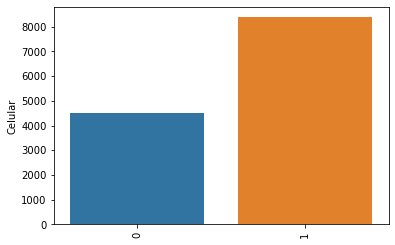

graph for Computador: total = 2


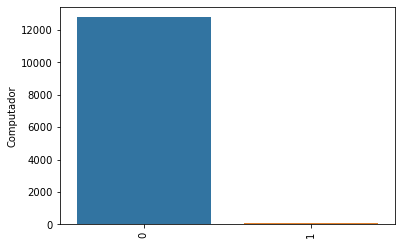

graph for DVD: total = 2


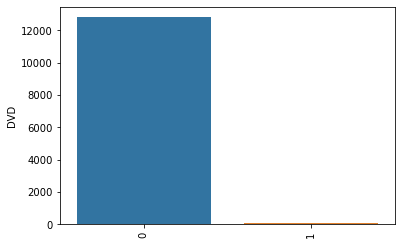

graph for Dinheiro: total = 2


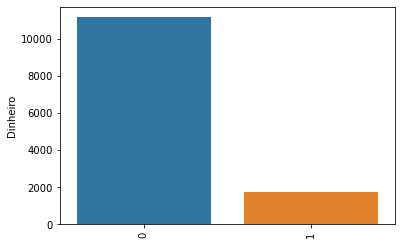

graph for Documentos: total = 2


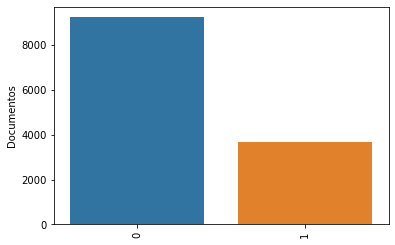

graph for Equipamento de Som: total = 2


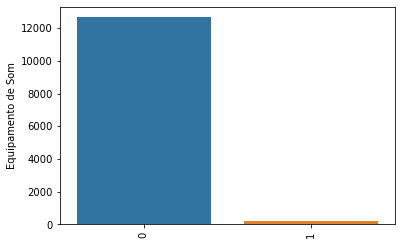

graph for Estepe: total = 2


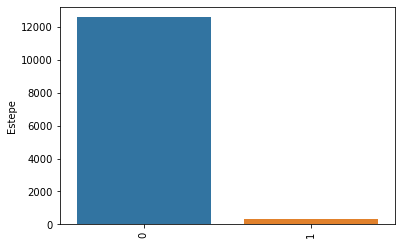

graph for MP4 ou Ipod: total = 2


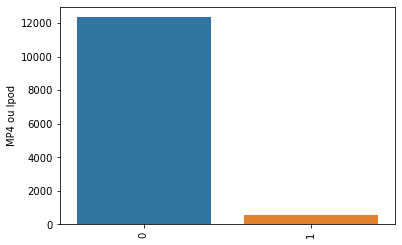

graph for Móveis: total = 2


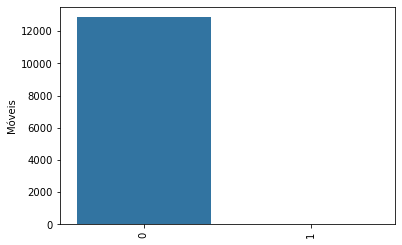

graph for Notebook: total = 2


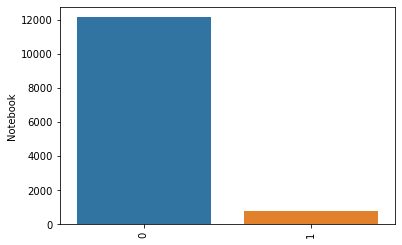

graph for Outros: total = 2


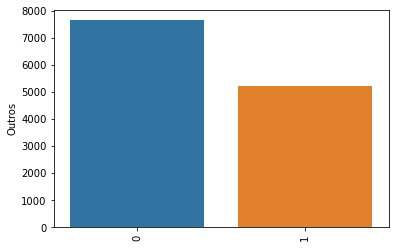

graph for Relógio: total = 2


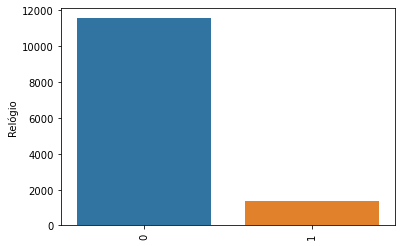

graph for Som: total = 2


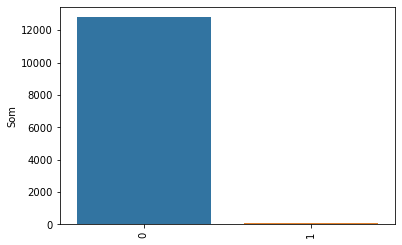

graph for Tablet: total = 2


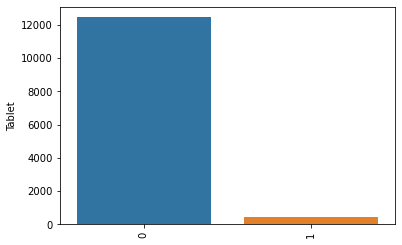

graph for Tv: total = 2


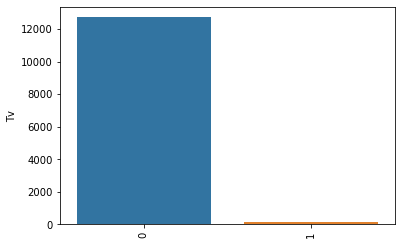

In [16]:
for i in df_bin.columns:
    cat_num = df_bin[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [17]:
df_bin.dtypes

Bicicleta             int64
Bolsa ou Mochila      int64
Carteira              int64
Cartão de Crédito     int64
Celular               int64
Computador            int64
DVD                   int64
Dinheiro              int64
Documentos            int64
Equipamento de Som    int64
Estepe                int64
MP4 ou Ipod           int64
Móveis                int64
Notebook              int64
Outros                int64
Relógio               int64
Som                   int64
Tablet                int64
Tv                    int64
dtype: object

In [18]:
df_bin.head()

,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [19]:
df_bin.columns


Index(['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'],
      dtype='object')

In [20]:
df_bin['Bolsa ou Mochila'].sum()

3631

In [21]:
data_obj = {'Object': ['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito',
                       'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos',
                       'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 'Notebook',
                       'Outros', 'Relógio', 'Som', 'Tablet', 'Tv'],
            'Count': [df_bin.Bicicleta.sum(), df_bin['Bolsa ou Mochila'].sum(), df_bin['Carteira'].sum(),
                      df_bin['Cartão de Crédito'].sum(),
                      df_bin['Celular'].sum(), df_bin['Computador'].sum(), df_bin['DVD'].sum(),
                      df_bin['Dinheiro'].sum(), df_bin['Documentos'].sum(), df_bin['Equipamento de Som'].sum(),
                      df_bin['Estepe'].sum(),
                      df_bin['MP4 ou Ipod'].sum(), df_bin['Móveis'].sum(), df_bin['Notebook'].sum(),
                      df_bin['Outros'].sum(), df_bin['Relógio'].sum(), df_bin['Som'].sum(), df_bin['Tablet'].sum(), 
                      df_bin['Tv'].sum()]
           }

objeto = pd.DataFrame (data_obj, columns = ['Object','Count'])
objeto

,Object,Count
0,Bicicleta,256
1,Bolsa ou Mochila,3631
2,Carteira,4243
3,Cartão de Crédito,2776
4,Celular,8377
5,Computador,112
6,DVD,94
7,Dinheiro,1730
8,Documentos,3660
9,Equipamento de Som,239


<AxesSubplot:title={'center':'Qty Objects robbed'}, xlabel='Object', ylabel='Count'>

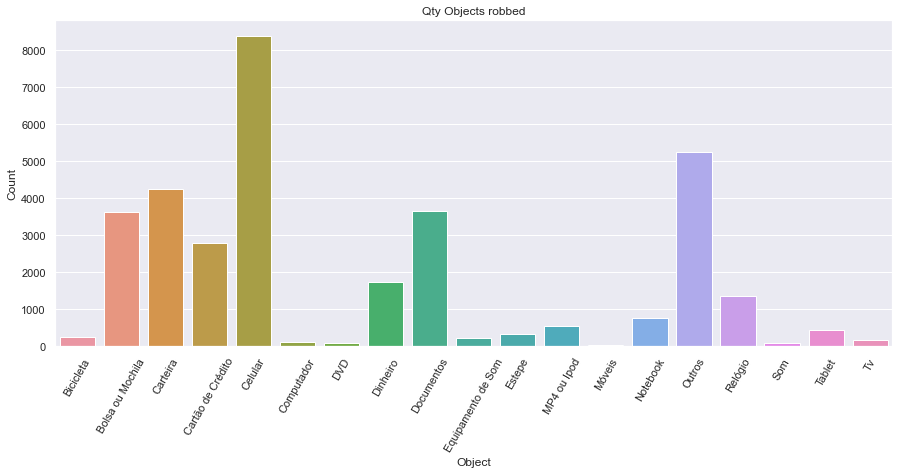

In [35]:
plt.figure(figsize=(15,6))
plt.title("Qty Objects robbed")
plt.xticks(rotation=60)
sns.barplot(x= objeto.Object, y=objeto.Count) 

In [23]:
s=df_sao['sexo'].value_counts()
print(s)

1    7901
0    4998
Name: sexo, dtype: int64


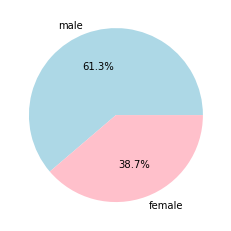

In [24]:
label=['male','female']
colors=['lightblue','pink']
plt.pie(s,labels=label,colors=colors,autopct='%1.1f%%')
plt.show()

In [25]:
df_sao.time = pd.to_datetime(df_sao.time)
df_sao.dtypes

id                             int64
bairro                        object
created_at                    object
descricao                     object
sexo                           int64
tipo_assalto_id                int64
titulo                        object
valor_prejuizo               float64
Bicicleta                      int64
Bolsa ou Mochila               int64
Carteira                       int64
Cartão de Crédito              int64
Celular                        int64
Computador                     int64
DVD                            int64
Dinheiro                       int64
Documentos                     int64
Equipamento de Som             int64
Estepe                         int64
MP4 ou Ipod                    int64
Móveis                         int64
Notebook                       int64
Outros                         int64
Relógio                        int64
Som                            int64
Tablet                         int64
Tv                             int64
t

<AxesSubplot:title={'center':'Crimes by hour '}, xlabel='time', ylabel='Quantity of crimes'>

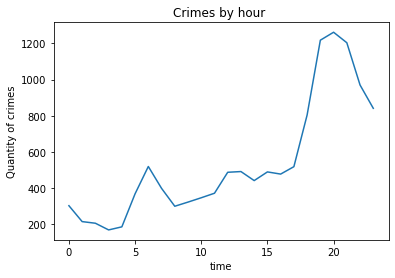

In [26]:
plt.xlabel('Hour')
plt.ylabel('Quantity of crimes')
plt.title("Crimes by hour ")
df_sao.time.groupby(df_sao["time"].dt.hour).count().plot(kind="line")

In [27]:
# We need to group by assault type. #
df_sao.tipo_assalto_id.value_counts()

2     5802
1     2980
9     1042
3      965
5      800
11     524
6      369
4      179
10     126
8       75
7       37
Name: tipo_assalto_id, dtype: int64

<AxesSubplot:title={'center':'Type of assaults'}, xlabel='tipo_assalto_id', ylabel='count'>

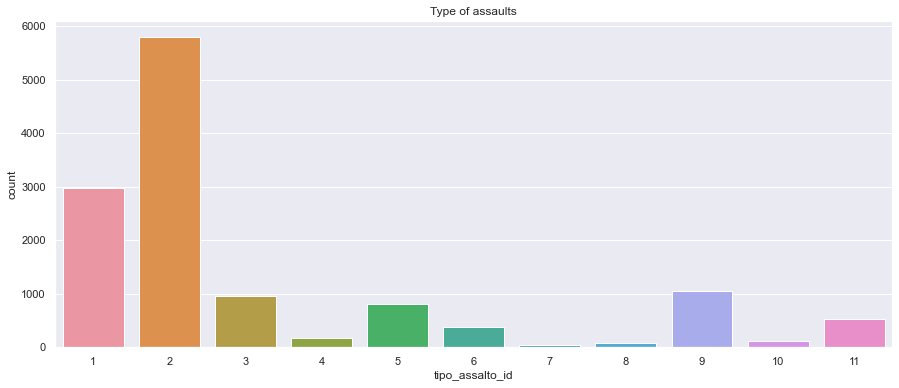

In [36]:
plt.figure(figsize=(15,6))
plt.title("Type of assaults")
sns.countplot(x='tipo_assalto_id', data=df_sao)

In [43]:
df_sao2 = df_sao[df_sao['tipo_assalto_id']==2] 
df_sao1 = df_sao[df_sao['tipo_assalto_id']==1]
df_sao9 = df_sao[df_sao['tipo_assalto_id']==9] 
df_sao3 = df_sao[df_sao['tipo_assalto_id']==3]
df_sao5 = df_sao[df_sao['tipo_assalto_id']==5]
df_sao11 = df_sao[df_sao['tipo_assalto_id']==11]

df_sao2.descricao = df_sao2.descricao.astype(str)
df_sao1.descricao = df_sao1.descricao.astype(str)
df_sao9.descricao = df_sao9.descricao.astype(str)
df_sao3.descricao = df_sao3.descricao.astype(str)
df_sao5.descricao = df_sao5.descricao.astype(str)
df_sao11.descricao = df_sao11.descricao.astype(str)


D:\Aanconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Tittle WordCloud for Type Assault 2:


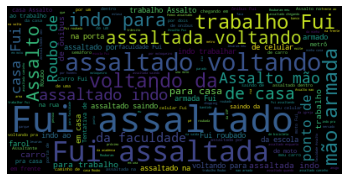

Description WordCloud for Type Assault 2:


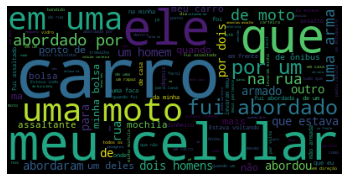

In [46]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud2 = WordCloud().generate(' '.join(df_sao2['titulo']))
print ('Tittle WordCloud for Type Assault 2:')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

descwordcloud2 = WordCloud().generate(' '.join(df_sao2['descricao']))
print ('Description WordCloud for Type Assault 2:')
plt.imshow(descwordcloud2)
plt.axis("off")
plt.show()


Tittle WordCloud for Type Assault 1:


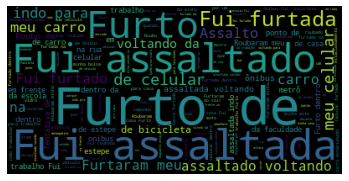

Description WordCloud for Type Assault 1:


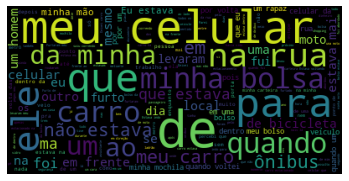

In [47]:
wordcloud1 = WordCloud().generate(' '.join(df_sao1['titulo']))
print ('Tittle WordCloud for Type Assault 1:')
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

descwordcloud1 = WordCloud().generate(' '.join(df_sao1['descricao']))
print ('Description WordCloud for Type Assault 1:')
plt.imshow(descwordcloud1)
plt.axis("off")
plt.show()

Tittle WordCloud for Type Assault 9:


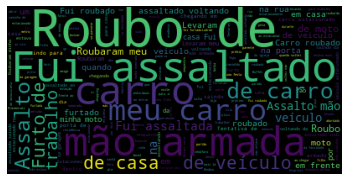

Description WordCloud for Type Assault 9:


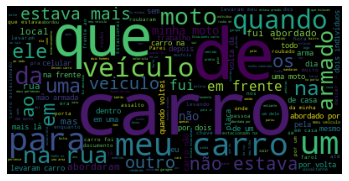

In [48]:
wordcloud9 = WordCloud().generate(' '.join(df_sao9['titulo']))
print ('Tittle WordCloud for Type Assault 9:')
plt.imshow(wordcloud9)
plt.axis("off")
plt.show()

descwordcloud9 = WordCloud().generate(' '.join(df_sao9['descricao']))
print ('Description WordCloud for Type Assault 9:')
plt.imshow(descwordcloud9)
plt.axis("off")
plt.show()

Tittle WordCloud for Type Assault 3:


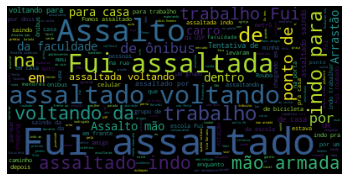

Description WordCloud for Type Assault 3:


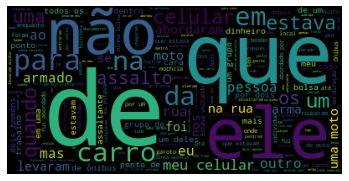

In [49]:
wordcloud3 = WordCloud().generate(' '.join(df_sao3['titulo']))
print ('Tittle WordCloud for Type Assault 3:')
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

descwordcloud3 = WordCloud().generate(' '.join(df_sao3['descricao']))
print ('Description WordCloud for Type Assault 3:')
plt.imshow(descwordcloud3)
plt.axis("off")
plt.show()

Tittle WordCloud for Type Assault 5:


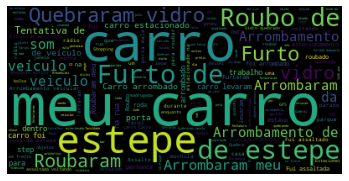

Description WordCloud for Type Assault 5:


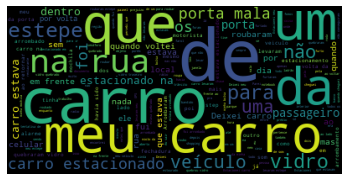

In [50]:
wordcloud5 = WordCloud().generate(' '.join(df_sao5['titulo']))
print ('Tittle WordCloud for Type Assault 5:')
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

descwordcloud5 = WordCloud().generate(' '.join(df_sao5['descricao']))
print ('Description WordCloud for Type Assault 5:')
plt.imshow(descwordcloud5)
plt.axis("off")
plt.show()

Tittle WordCloud for Type Assault 11:


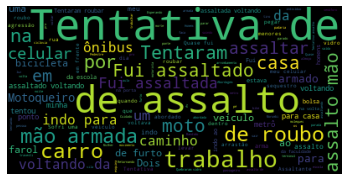

Description WordCloud for Type Assault 11:


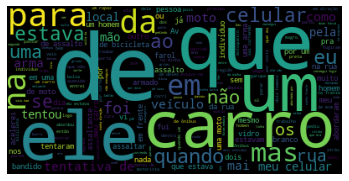

In [51]:
wordcloud11 = WordCloud().generate(' '.join(df_sao11['titulo']))
print ('Tittle WordCloud for Type Assault 11:')
plt.imshow(wordcloud11)
plt.axis("off")
plt.show()

descwordcloud11 = WordCloud().generate(' '.join(df_sao11['descricao']))
print ('Description WordCloud for Type Assault 11:')
plt.imshow(descwordcloud11)
plt.axis("off")
plt.show()